In [112]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [113]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
from matplotlib import dates as mdates 

# Reflect Tables into SQLAlchemy ORM

In [114]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [115]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite").connect()

In [171]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

C:\Users\gruiz\AppData\Local\Temp\1\ipykernel_14664\2835508603.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [172]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [173]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [174]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [175]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date[0]

'2017-08-23'

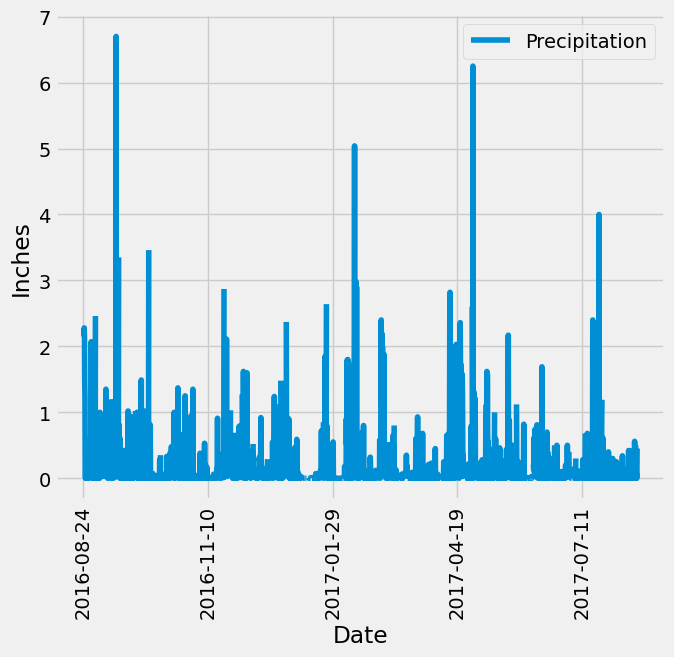

In [176]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in data set.
one_year_ago = datetime.strptime(most_recent_date[0], "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
precipitation_df.set_index('Date', inplace=True)
precipitation_df = precipitation_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(7,6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)

plt.show()

In [177]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Calculate the mean 
mean_precipitation = df['Precipitation'].mean()
print("Mean Precipitation:", mean_precipitation)

# Calculatethe median 
median_precipitation = df['Precipitation'].median()
print("Median Precipitation:", median_precipitation)

# Calculate the standard deviation 
std_dev_precipitation = df['Precipitation'].std()
print("Standard Deviation of Precipitation:", std_dev_precipitation)

df_without_date = df[['Precipitation']]
df_without_date.describe()

Mean Precipitation: 0.17646153846153848
Median Precipitation: 0.02
Standard Deviation of Precipitation: 0.4602883636813204


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [178]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print("Total Stations:", total_stations)

Total Stations: 9


In [179]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [180]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations[0][0] 

# Design a query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station_id).all()

# Print the lowest, highest, and average temperature
print(f"Most Active Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {lowest_temp} °F")
print(f"Highest Temperature: {highest_temp} °F")
print(f"Average Temperature: {avg_temp} °F")

Most Active Station ID: USC00519281
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66378066378067 °F


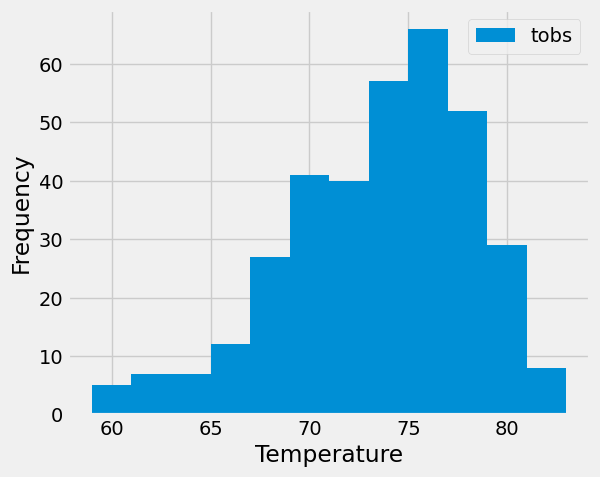

In [181]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date = session.query(func.max(Measurement.date)).scalar()
twelve_months_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Query temperature observations for the most active station ID within the last 12 months
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= twelve_months_ago).\
    filter(Measurement.date <= most_recent_date).all()

# Store the results in a Pandas DataFrame
df_temperature = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot the histogram of temperature observations
plt.figure(figsize=(6, 5))
plt.hist(df_temperature['Temperature'], bins=12,)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc='upper right')

plt.show()

# Close Session

In [182]:
# Close Session
session.close()